# **Entrenamiento y prediccion**

## **Metodos necesarios**

### **Matriz de confusion**

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title='Matriz de Confusión', cmap=plt.cm.Blues):
    """
    Esta función muestra una matriz de confusión en forma gráfica.
    """
    # Crear matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Normalizar los valores si es necesario
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Configurar el gráfico
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Etiquetar los ejes
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()
    plt.show()

# **1. Enfoque 1 - Frecuencia Mel**

In [33]:
import pandas as pd

df = pd.read_csv('./Datos/enfoque1/dataframe.csv')

df

,feature,label
0,[-655.03894 63.1695 10.757038 21.1...,whistle
1,[-578.7469 81.91728 -10.924023 11.2...,whistle
2,[-567.00964 82.101105 -14.731988 12.7339...,whistle
3,[-576.83685 77.57335 -15.542832 14.3...,whistle
4,[-557.8747 78.30917 -13.749625 16.7...,whistle
...,...,...
5454,[-562.69415 70.66823 -6.884647 23.8...,allfreq
5455,[-546.1909 69.080666 -14.523592 22.1...,allfreq
5456,[-586.30975 74.10078 -6.768806 26.6...,allfreq
5457,[-585.0476 75.75177 -2.8806534 26.3...,allfreq


In [34]:
import numpy as np

print(type(df['feature'][0]))

# Función para convertir la cadena en un arreglo NumPy
def convert_to_array(str_val):
    str_val = str_val.replace('\n', '').replace('  ', ' ')
    str_val = str_val.strip('[]')
    features_list = str_val.split()
    features = [float(value) for value in features_list]
    return np.array(features)

# Aplicar la función a la columna 'feature'
df['feature'] = df['feature'].apply(convert_to_array)

print(type(df['feature'][0]))

<class 'str'>
<class 'numpy.ndarray'>


In [35]:
features = df['feature'].to_list()
X = pd.DataFrame(columns=range(len(features[0])), data=features)
y = df.drop(columns='feature')

In [36]:
from sklearn.model_selection import train_test_split

# Dividir el tercio aleatorio en un 20% para el conjunto de prueba y un 80% para el conjunto de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models.sort_values('Accuracy', ascending=False)


100%|██████████| 29/29 [00:09<00:00,  3.00it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.71,0.40,None,0.69,1.60
SVC,0.71,0.40,None,0.69,0.72
ExtraTreesClassifier,0.70,0.39,None,0.68,0.48
LGBMClassifier,0.70,0.40,None,0.68,0.29
BaggingClassifier,0.69,0.40,None,0.68,0.69
RidgeClassifierCV,0.68,0.36,None,0.64,0.03
LinearSVC,0.68,0.36,None,0.65,0.60
CalibratedClassifierCV,0.68,0.36,None,0.65,2.27
RidgeClassifier,0.68,0.36,None,0.64,0.03


**RandomForestClassifier**

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Definir los hiperparámetros a explorar en el modelo
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced'],
}

# Crear un objeto SVC y aplicar la búsqueda aleatoria de hiperparámetros
rf_classifier = RandomForestClassifier(n_jobs=-1)

random_rfc = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, cv=5, random_state=0, n_jobs=-1)
random_rfc.fit(X_train, y_train)
print('Done!')

Done!


Best params: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': True}
Accuracy: 0.7197802197802198


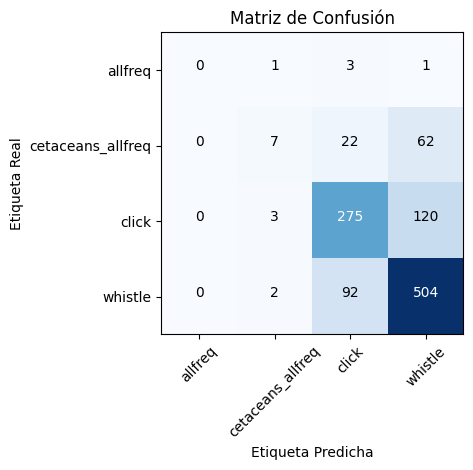

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Realizar predicciones en el conjunto de prueba
y_pred = random_rfc.best_estimator_.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Best params:", random_rfc.best_params_)
print("Accuracy:", accuracy)

# Imprimir matriz de confusión
plot_confusion_matrix(y_test, y_pred, classes = unique_labels(y_test, y_pred))

**SVC**

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Definir los hiperparámetros a explorar en el modelo
param_dist = {
    'C': [1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto'],
    'shrinking': [False],
    'decision_function_shape': ['ovo', 'ovr'],
    'break_ties': [True, False]
}

# Crear un objeto SVC y aplicar la búsqueda aleatoria de hiperparámetros
svm = SVC()

random_svm = RandomizedSearchCV(estimator=svm, param_distributions=param_dist, cv=5, random_state=0, n_jobs=-1)
random_svm.fit(X_train, y_train)
print('Done!')

Done!


Best params: {'shrinking': False, 'kernel': 'poly', 'gamma': 'auto', 'degree': 2, 'decision_function_shape': 'ovr', 'break_ties': False, 'C': 1}
Accuracy: 0.6804029304029304


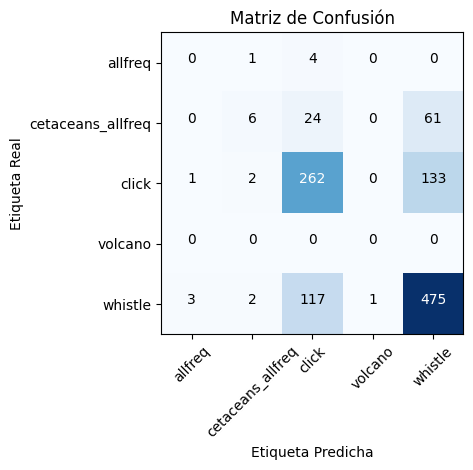

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

y_pred = random_svm.best_estimator_.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Best params:", random_svm.best_params_)
print("Accuracy:", accuracy)

# Imprimir matriz de confusión
plot_confusion_matrix(y_test, y_pred, classes=unique_labels(y_test, y_pred))


**Red Neuronal con LSTM**

In [48]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Combinar y_train y y_test
y_combined = np.concatenate((y_train, y_test), axis=0)

# Aplicar LabelEncoder y to_categorical a y_combined
le = LabelEncoder()
y_encoded = le.fit_transform(y_combined)
y_categorical = to_categorical(y_encoded)

# Dividir nuevamente en y_train y y_test
y_train = y_categorical[:len(y_train)]
y_test = y_categorical[len(y_train):]


In [49]:
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Definir la arquitectura del modelo
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))
model.add(Dense(32))
model.add(Dense(64))
model.add(Dense(128))
model.add(Dense(5, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=128,
          validation_data=(X_test, y_test))

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)


Epoch 1/50
35/35 [==============================] - 2s 18ms/step - loss: 0.9983 - accuracy: 0.5127 - val_loss: 0.9238 - val_accuracy: 0.5632
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 0.9242 - accuracy: 0.5493 - val_loss: 0.8780 - val_accuracy: 0.6081
Epoch 3/50
35/35 [==============================] - 0s 6ms/step - loss: 0.9100 - accuracy: 0.5610 - val_loss: 0.8596 - val_accuracy: 0.6209
Epoch 4/50
35/35 [==============================] - 0s 7ms/step - loss: 0.8874 - accuracy: 0.5835 - val_loss: 0.8614 - val_accuracy: 0.5897
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 0.8783 - accuracy: 0.5853 - val_loss: 0.8412 - val_accuracy: 0.6383
Epoch 6/50
35/35 [==============================] - 0s 6ms/step - loss: 0.8746 - accuracy: 0.5938 - val_loss: 0.8491 - val_accuracy: 0.6117
Epoch 7/50
35/35 [==============================] - 0s 6ms/step - loss: 0.8659 - accuracy: 0.5947 - val_loss: 0.8556 - val_accuracy: 0.6419
Epoch 8/50
35/35 [=

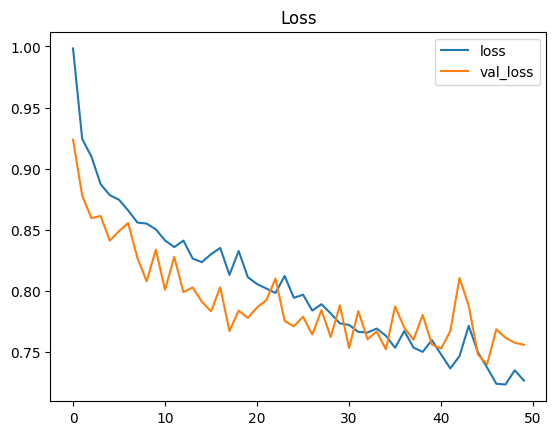

In [50]:
# Make a plot for the loss
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

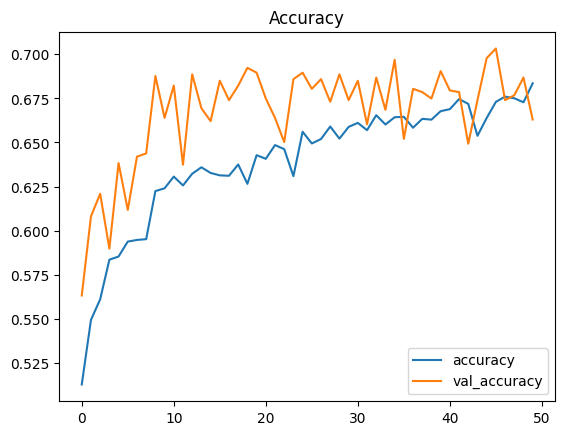

In [51]:
# Make a plot for the accuracy
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

In [14]:
y_pred = model.predict(X_test)
y_test_decoded = le.inverse_transform(np.argmax(y_test, axis=1))
y_pred_decoded = le.inverse_transform(np.argmax(y_pred, axis=1))

35/35 [==============================] - 0s 2ms/step


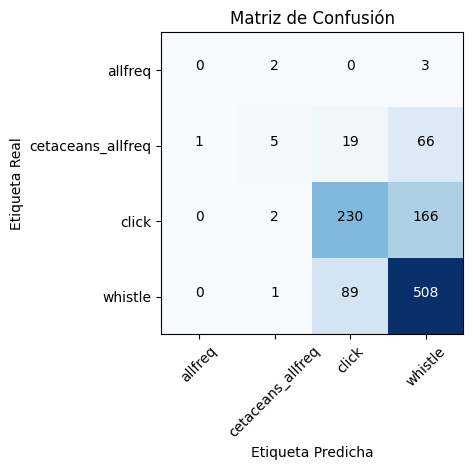

In [15]:
plot_confusion_matrix(y_test_decoded, y_pred_decoded, classes=unique_labels(y_test_decoded, y_pred_decoded))

# **2. Enfoque 2 - Imagenes de espectogramas**

In [53]:
from keras.preprocessing.image import ImageDataGenerator

In [54]:
TARGET_SIZE = (400, 400)
SEED = 42

In [115]:
train_generator = ImageDataGenerator(
    rescale=1/255.,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_batches = train_generator.flow_from_directory(
    directory="./Datos/enfoque2",
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    seed=SEED,
    subset='training')

valid_batches = train_generator.flow_from_directory(
    directory="./Datos/enfoque2",
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    seed=SEED,
    subset='validation')


Found 4370 images belonging to 5 classes.
Found 1089 images belonging to 5 classes.


In [96]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, TimeDistributed, LSTM

In [97]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(400, 400, 3)),
    MaxPooling2D((3,3)),
    Dropout(0.3),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((3,3)),
    Dropout(0.3),
    TimeDistributed(Flatten()),
    TimeDistributed(Dense(128, activation='relu')),
    LSTM(64),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 398, 398, 64)      1792      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 132, 132, 64)     0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 132, 132, 64)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 130, 130, 32)      18464     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 43, 43, 32)       

In [98]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [99]:
history = model.fit(
    train_batches,
    validation_data=valid_batches,
    batch_size=32,
    epochs=10
)

Epoch 1/10
137/137 [==============================] - 113s 820ms/step - loss: 1.0033 - accuracy: 0.4826 - val_loss: 0.9445 - val_accuracy: 0.5280
Epoch 2/10
137/137 [==============================] - 112s 816ms/step - loss: 0.9693 - accuracy: 0.5069 - val_loss: 0.9426 - val_accuracy: 0.5280
Epoch 3/10
137/137 [==============================] - 111s 812ms/step - loss: 0.9617 - accuracy: 0.5174 - val_loss: 0.9429 - val_accuracy: 0.5280
Epoch 4/10
137/137 [==============================] - 110s 805ms/step - loss: 0.9621 - accuracy: 0.5181 - val_loss: 0.9431 - val_accuracy: 0.5280
Epoch 5/10
137/137 [==============================] - 112s 820ms/step - loss: 0.9607 - accuracy: 0.5236 - val_loss: 0.9394 - val_accuracy: 0.5280
Epoch 6/10
137/137 [==============================] - 112s 816ms/step - loss: 0.9579 - accuracy: 0.5259 - val_loss: 0.9407 - val_accuracy: 0.5280
Epoch 7/10
137/137 [==============================] - 112s 816ms/step - loss: 0.9547 - accuracy: 0.5243 - val_loss: 0.9415 -

Found 5459 images belonging to 5 classes.


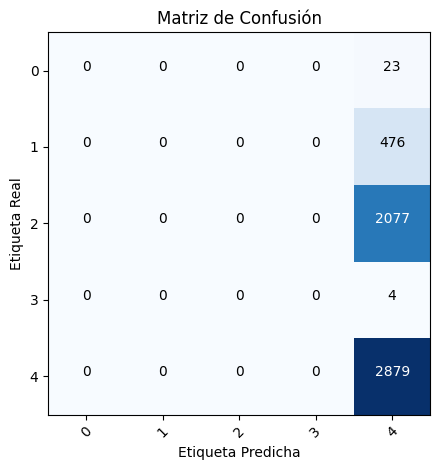

In [118]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        directory="./Datos/enfoque2",
        target_size=TARGET_SIZE,
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator,steps = nb_samples)

true_labels = test_generator.labels
predicted_labels = np.argmax(predict, axis=1)

plot_confusion_matrix(true_labels, predicted_labels, classes=unique_labels(true_labels, predicted_labels))

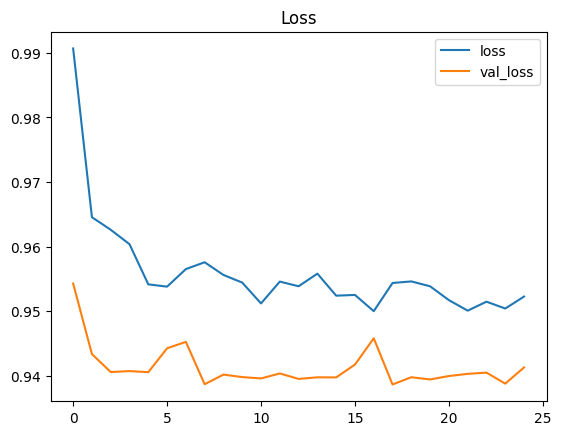

In [60]:
# Make a plot for the loss
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

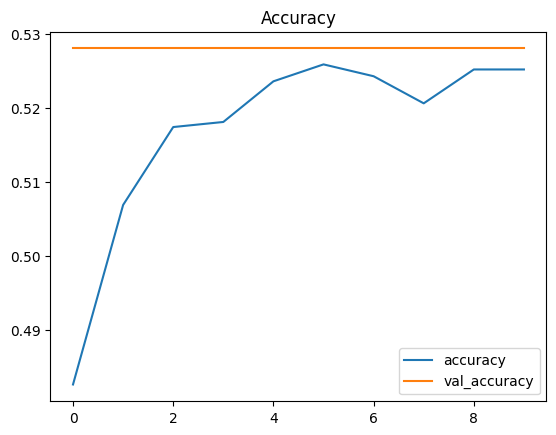

In [120]:
# Make a plot for the accuracy
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()